<a href="https://colab.research.google.com/github/gerompampastrumf/JJ_neuron/blob/main/JJneuron_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# All functions

Systems

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from numpy.lib.scimath import sqrt
import cmath
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
#system rotated by 45
def Josephson_neuron_rotated(t,variables,params):
  theta_1, om_1, theta_2, om_2 = variables
  i_in,L_p, L_s, G, l, h, i_bi = params
  
  theta_1_dot = om_1 
  om_1_dot =-G*om_1 - 2*np.sin(theta_1/2)*np.cos(theta_2/2) -l*theta_1*(1+1/h) + L_s*i_in*(1+1/h) +i_bi*(1-L_p-L_p/h)
  theta_2_dot = om_2
  om_2_dot =-G*om_2 - 2*np.sin(theta_2/2)*np.cos(theta_1/2) -l*theta_1*(1-1/h) + L_s*i_in*(1-1/h) +i_bi*(1-L_p+L_p/h)
  
  return np.array([theta_1_dot, om_1_dot, theta_2_dot, om_2_dot])

#System with varied i_in in time
def Josephson_neuron_rotated_variable_i_in(t,variables,params):
  theta_1, om_1, theta_2, om_2 = variables
  i_in0,L_p, L_s, G, l, h, i_bi = params
  i_in = i_function(t,i_in0)

  theta_1_dot = om_1 
  om_1_dot =-G*om_1 - 2*np.sin(theta_1/2)*np.cos(theta_2/2) -l*theta_1*(1+1/h) + L_s*i_in*(1+1/h) +i_bi*(1-L_p-L_p/h)
  theta_2_dot = om_2
  om_2_dot =-G*om_2 - 2*np.sin(theta_2/2)*np.cos(theta_1/2) -l*theta_1*(1-1/h) + L_s*i_in*(1-1/h) +i_bi*(1-L_p+L_p/h)
  
  return [ theta_1_dot, om_1_dot, theta_2_dot, om_2_dot]
#initial system
def Josephson_neuron_variable_i_in(t,variables,params):
  ph_p, om_p, ph_c, om_c = variables
  i_in0,L_p, L_s, G, l, h, i_bi = params
  i_in = i_function(t,i_in0)
  
  ph_p_dot = om_p 
  om_p_dot = -G * om_p - np.sin(ph_p) - l *  (ph_c + ph_p) + L_s * i_in   + i_bi * (1 - L_p)
  ph_c_dot = om_c
  om_c_dot = -G * om_c - np.sin(ph_c) - l/h *(ph_c + ph_p) + L_s * i_in/h - i_bi *  L_p/h
  
  return np.array([ph_p_dot, om_p_dot, ph_c_dot, om_c_dot])

#initial system
def Josephson_neuron(t,variables,params):
  ph_p, om_p, ph_c, om_c = variables
  i_in,L_p, L_s, G, l, h, i_bi = params
  
  ph_p_dot = om_p 
  om_p_dot = -G * om_p - np.sin(ph_p) - l *  (ph_c + ph_p) + L_s * i_in   + i_bi * (1 - L_p)
  ph_c_dot = om_c
  om_c_dot = -G * om_c - np.sin(ph_c) - l/h *(ph_c + ph_p) + L_s * i_in/h - i_bi *  L_p/h
  
  return np.array([ph_p_dot, om_p_dot, ph_c_dot, om_c_dot])
#Jacobian for the initial system
def Jacobian_Josephson(t,variables,params):
  ph_p, om_p, ph_c, om_c = variables
  i_in,L_p, L_s, G, l, h, i_bi = params
  jacobian = np.zeros((4,4))

  jacobian[0,:] = np.array([0,1,0,0])
  jacobian[1,:] = np.array([-np.cos(ph_p)-l,-G,-l,0])
  jacobian[2,:] = np.array([0,0,0,1])
  jacobian[3,:] = np.array([-l,0,-np.cos(ph_c)-l,-G])
  return jacobian

Functions for finding analytical qualities (eigen,roots) 

In [3]:
#Symbollicaly calculated eigenvalues for the initial system  
from numpy.lib.scimath import sqrt
def eigen_Josephson(t,variables,params):
  G, l = params
  ph_p, om_p, ph_c, om_c = variables

  A = 2*sqrt((np.cos(ph_p)-np.cos(ph_c))**2+4*l**2)
  B = -2*(np.cos(ph_p)+np.cos(ph_c)+2*l)+G**2
  return np.array([0.5*(-sqrt(-A+B)-G),0.5*(sqrt(-A+B)-G),0.5*(-sqrt(A+B)-G),0.5*(sqrt(A+B)-G)])

def func_where0_fp(x,params):
  i_in ,L_p, L_s, G, l, h, i_b = params
  return np.sin(x)-np.sin(-np.sin(x)/l-x+(L_s*i_in+(1-L_p)*i_b)/l)-i_b

def phic_in_fp(phip,params):
  i_in ,L_p, L_s, _, l, h, i_b = params
  return -np.sin(phip)/l-phip+(L_s*i_in+(1-L_p)*i_b)/l

def dot_func_where0_fp(x,params):
  i_in ,L_p, L_s, G, l, h, i_b = params
  return np.cos(x)-np.cos(-np.sin(x)/l-x+(L_s*i_in+(1-L_p)*i_b)/l)*(-np.cos(x)/l-1)

#finds the x limits of function sin(y)-sin(x) = i_b for a given i_b
def edge_arcsin_func(i_bi):
  if(i_bi>=2 or i_bi<=-2):
    return []
  elif(i_bi>=0):
    return [np.arcsin(i_bi-1),np.pi-np.arcsin(i_bi-1)]
  elif(i_bi<0):
    return [-np.pi-np.arcsin(i_bi+1),np.arcsin(i_bi+1)]



More complicated functions 

In [4]:
def find_phip_fp(params,tol = 0.01):
  x = np.arange(*edge_arcsin_func(params[6]),tol)
  y=func_where0_fp(x,params)
  bolzano_edges = y[1:] * y[:-1]
  indices = np.array(np.where(bolzano_edges <= 0))
  if(x[indices].shape!=(1,0)):
    return x[indices][0]
  else:
    return None

def find_phip_fp_iin(params,all_i_in,tol = 0.01): 
  all_fixed_points = []
  for i_in in all_i_in:
    params[0] = i_in
    all_fixed_points.append(find_phip_fp(params,tol = tol))
  return all_fixed_points

def find_phip_fp_iin_number(params,all_i_in,tol = 0.01): 
  all_fixed_points = []
  for i_in in all_i_in:
    params[0] = i_in
    temp = find_phip_fp(params,tol = tol)
    if(temp is not None):
      all_fixed_points.append(len(temp))
    else:
      all_fixed_points.append(0)
  return all_fixed_points 

def saddle_quantity(eig):
  real_eig = np.real(eig)
  return real_eig[real_eig<0].max()+real_eig[real_eig>0].min()
  
def last_y(func,t_span,y0,args,max_step):
  neuron = solve_ivp(func,t_span = t_span,y0 = y0,args = args,max_step = max_step)
  return neuron.y[:,-1]

def find_frequency_error(t,y):
  indices = argrelextrema(y,np.greater)
  if(indices[0].shape[0]<1):
    return [0,0]
  index_max = np.argmax(y[1:-2])+1
  tolerance = (2*y[index_max]-y[index_max+1]-y[index_max-1])/2
  diffT = np.diff(t[indices][y[indices]>np.abs(y[index_max]-2*tolerance)])
  if(diffT.shape[0]<1):
    return [0,0]
  diffTmean = np.average(diffT)
  return [1/diffTmean,np.std(diffT)/diffTmean**2]

#Introduction of equations and example of rotated system 
Initial system which simulates 1 JJ neuron. 
Equations are:

$\phi_p = \omega_p$

$\dot\omega_{p} = -\Gamma\omega_p-sin(\phi_p) -\lambda(\phi_c+\phi_p)+\Lambda_si_{in}+(1-\Lambda_p)i_b $

$\phi_c = \omega_c$

$\dot\omega_{c} = \frac{1}{\eta}[-\Gamma\omega_c-sin(\phi_c) -\lambda(\phi_c+\phi_p)+\Lambda_si_{in}-\Lambda_p i_b] $

We can introduce the variable change

$\theta_1 = \phi_p+\phi_c$

$\theta_2 = \phi_p-\phi_c$

Than the system becomes:


$\dot\theta_1 = \omega_1$

$\dot\omega_1 = -\Gamma \omega_1 - 2 \sin{\frac{\theta_1}{2}}\cos{\frac{\theta_2}{2}} - \lambda \theta_1(1+\frac{1}{\eta}) + \Lambda_s i_{in}(1+\frac{1}{\eta}) + i_b(1-\Lambda_p-\frac{\Lambda_p}{\eta})$

$\dot\theta_2 = \omega_2$

$\dot\omega_2 = -\Gamma \omega_2 - 2 \sin{\frac{\theta_2}{2}}\cos{\frac{\theta_1}{2}} - \lambda \theta_1(1-\frac{1}{\eta}) + \Lambda_s i_{in}(1-\frac{1}{\eta}) + i_b(1-\Lambda_p+\frac{\Lambda_p}{\eta})$

In [ ]:
L_p = 0.5
L_s = 0.5
G   = 0.8
l   = 0.1
h   = 1
i_bi= 1.909
all_V=[]
all_V_dot=[]
all_i_in = [0.16,0.17,0.20]
for i_in in all_i_in:
  params = [[i_in,L_p, L_s, G, l, h, i_bi]]
  neuron = solve_ivp(Josephson_neuron,t_span = (0,4000),y0 = (0,20,0,0),args = params,max_step = 0.1)
  ind = len(neuron.y[0])//2
  all_V.append(neuron.y[0,ind:]+neuron.y[2,ind:])
  all_V_dot.append(neuron.y[1,ind:]+neuron.y[3,ind:])

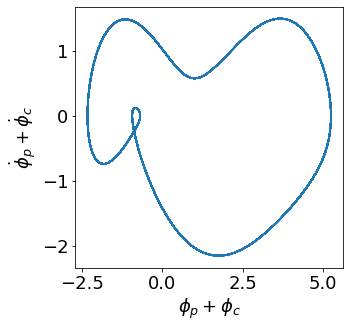

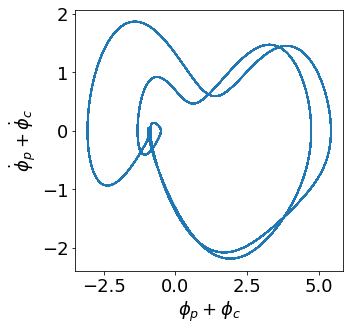

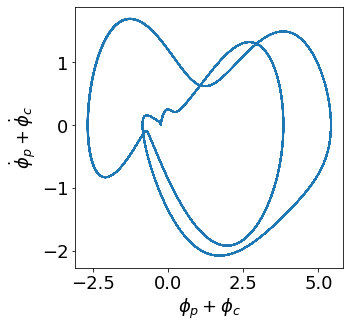

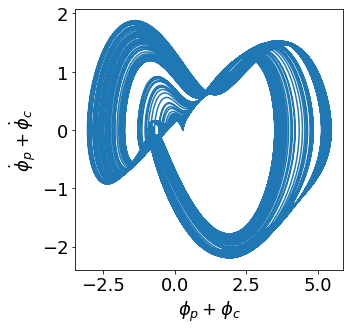

In [ ]:
matplotlib.rcParams.update({'font.size': 18})
for i,i_in in enumerate(all_i_in):
  fig,axs = plt.subplots(1,1,figsize=(4.8,4.8))
  axs.plot(all_V[i],all_V_dot[i])

  axs.set_ylabel(r"$\dot\phi_p + \dot\phi_c$")
  axs.set_xlabel(r"$\phi_p+\phi_c$")
  plt.savefig("phaseplane"+str(i_in)+".png",bbox_inches="tight")

# Simulations 

##Bifurcation which defines class 1 neurons. Saddle node in invarient circle

In [ ]:
L_p = 0.5
L_s = 0.5
G   = 1.5
l   = 0.1
h   = 1
i_bi= 1.909

time_sim = (0,5000)
max_step = 1
all_i_in = np.linspace(0.1845,0.1860,60)
all_freq_info = []
for i_in in all_i_in:
  params = [[i_in,L_p, L_s, G, l, h, i_bi]]
  neuron = solve_ivp(Josephson_neuron_rotated,t_span = time_sim,y0 = (0,0,0,0),args = params,max_step = max_step)
  y0 =neuron.y[:,-1] 
  
  t = neuron.t[int(time_sim[1]/max_step)//10:]
  y = neuron.y[0][int(time_sim[1]/max_step)//10:] 
  all_freq_info.append(find_frequency_error(neuron.t,neuron.y[0]))


$i_{in}$ where SNIC bifurcation:0.18504


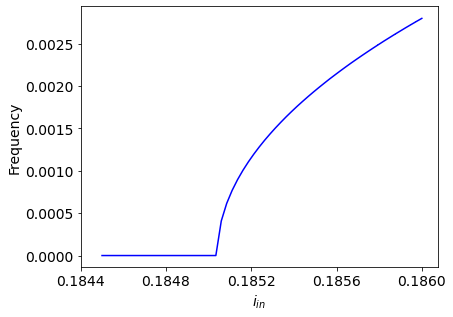

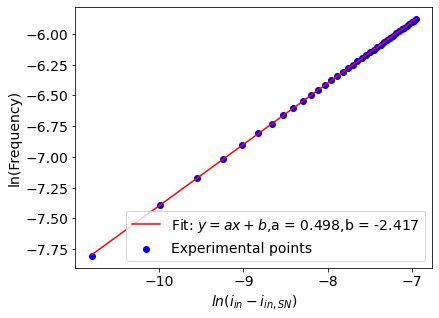

In [ ]:
all_freqs = np.array(all_freq_info)[:,0]

fig,axs = plt.subplots(figsize= [6.4, 4.8])

#Plot simulated points 
axs.errorbar(all_i_in,all_freqs,yerr=np.array(all_freq_info)[:,1],ls="None")
axs.plot(all_i_in,all_freqs,c='b')
start, end = axs.get_xlim()
#axs.xaxis.set_ticks(np.arange(start, end, 0.0004))
axs.xaxis.set_ticks(np.round(np.arange(start, end, 0.0004),decimals=4))

axs.set_xlabel(r"$i_{in}$")
axs.set_ylabel("Frequency")

#Fit square law y= a*sqrt(x-x_0)+beta. x_0 : last i_in where freq=0 for x<x_0, x=0
index_freq_is0=np.where(all_freqs==0)[0][-1]
i_in_SN = 0.185039
print(r"$i_{in}$ where SNIC bifurcation:" +str(np.round(i_in_SN,5)))
x = np.log((all_i_in-i_in_SN)[index_freq_is0+1:])
y = np.log(all_freqs[index_freq_is0+1:])

p =np.polyfit(x,y,1) 
#axs[0].text(0.1,0.5,'L_p = 0.5 \nL_s = 0.5\nG = 1.5\nl = 0.1\nh = 1\ni_bi = 1.909',transform=axs[0].transAxes)

plt.savefig("class1_scaleLaw_a.png",bbox_inches='tight')

fig,axs = plt.subplots(figsize= [6.4, 4.8])
#Plot 
axs.scatter(x,y,c='b',label = r"Experimental points")
axs.plot(x,p[0]*x+p[1],c='r',label = r"Fit: $y=ax+b$,a = "+str(round(p[0],3))+",b = "+str(round(p[1],3)))
axs.set_xlabel(r"$ln(i_{in}-i_{in,SN})$")
axs.set_ylabel("ln(Frequency)")
axs.legend()

plt.savefig("class1_scaleLaw_b.png",bbox_inches='tight')

## Homoclinic and 2nd class ($\Gamma = 0.9$, saddle node).  

In [5]:
%%time 
L_p = 0.5
L_s = 0.5
G   = 0.9
l   = 0.1
h   = 1
i_bi= 1.909
G = 0.9
#Simulation time
time_sim = (0,2000)
max_step = 0.5

i_start = 0.14
i_end = 0.19
N = 100
#
all_i_in = np.concatenate((np.linspace(i_start,i_end,N),np.linspace(i_end,i_start,N)))
all_freq_info = []
all_y0 = []

y0 = [0,0,0,0]
for i_in,index in zip(all_i_in,range(len(all_i_in))):
    #Simulate
    if(index%20==0):
      print(index)
    params = [[i_in,L_p, L_s, G, l, h, i_bi]]
    neuron = solve_ivp(Josephson_neuron_rotated,t_span = time_sim,y0 = y0,args = params,max_step = max_step)
    #Delete transient
    t = neuron.t[int(time_sim[1]/max_step)//5:]
    theta_1 = neuron.y[0][int(time_sim[1]/max_step)//5:]
    y0 = neuron.y[:,-1] 
    #Keep frequency maximum.
    all_freq_info.append(find_frequency_error(t,theta_1))
    all_y0.append(y0)

0
20
40
60
80
100
120
140
160
180
CPU times: user 2min 40s, sys: 843 ms, total: 2min 41s
Wall time: 2min 40s


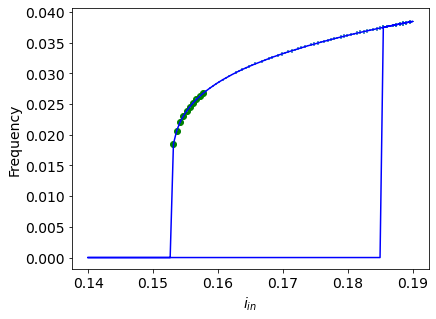

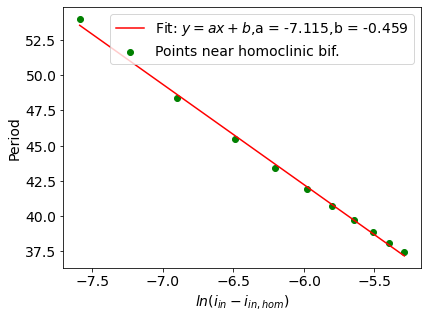

In [6]:
all_freqs = np.array(all_freq_info)[:,0]
index_freq_not0 = np.where(all_freqs>0)[0][-10:]
#Plot
fig,axs = plt.subplots(figsize= [6.4, 4.8])
axs.errorbar(all_i_in,np.array(all_freq_info)[:,0],yerr=np.array(all_freq_info)[:,1],ls="None")
axs.plot(all_i_in,np.array(all_freq_info)[:,0],'b',label = "Experimental points")
axs.scatter(all_i_in[index_freq_not0],np.array(all_freq_info)[index_freq_not0,0],c='g')
axs.set_xlabel(r"$i_{in}$")
axs.set_ylabel(r"Frequency")
plt.savefig("hom_example_a.png",bbox_inches='tight')
#
x = np.log(all_i_in[index_freq_not0]-all_i_in[index_freq_not0[-1]+1])
y = 1/all_freqs[index_freq_not0]
p =np.polyfit(x,y,1)
fig,axs = plt.subplots(figsize= [6.4, 4.8])
axs.scatter(x,y,c='g',label = "Points near homoclinic bif.")
axs.set_ylabel(r"Period")
axs.set_xlabel(r"$ln{(i_{in}-i_{in,hom})}$")
axs.plot(x,p[0]*x+p[1],c='r',label = r"Fit: $y=ax+b$,a = "+str(round(p[0],3))+",b = "+str(round(p[1],3)))
axs.legend()
plt.savefig("hom_example_b.png",bbox_inches='tight')



## Period doubling

In [ ]:
%%time
from scipy.signal import find_peaks
L_p = 0.5
L_s = 0.5
l   = 0.1
h   = 1
i_bi= 1.909
i_in = 0.20
G = 0.8
all_i_in_zoom = np.linspace(0.15,0.28,20)
flix_peaks_zoom = []
sim_time = (0,1000)
max_dt = 0.05

#Simulate
for i_in,index in zip(all_i_in_zoom,range(len(all_i_in_zoom))):
  if(index%20==0):
    print(index)
  params = [[i_in,L_p, L_s, G, l, h, i_bi]]
  neuron = solve_ivp(Josephson_neuron,t_span = sim_time,y0 = (0,20,0,0),args = params,max_step = max_dt)
  #transient 1/5 of simulation time
  flux = neuron.y[0,sim_time[1]*int(1/max_dt)//5:]+neuron.y[2,sim_time[1]*int(1/max_dt)//5:]
  #Store local maxima
  flix_peaks_zoom.append(np.unique(np.round(flux[find_peaks(flux)[0]],2)))

0
CPU times: user 1min 12s, sys: 327 ms, total: 1min 13s
Wall time: 1min 12s


Mounted at /content/drive


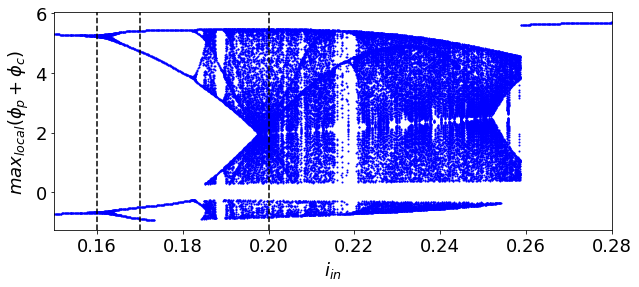

In [ ]:
import pickle
if (True):
  all_i_in_zoom = np.linspace(0.15,0.28,1000)
  from pylab import *
  from google.colab import drive
  drive.mount('/content/drive')
  with open(r"drive/MyDrive/JJneurons/Stored_data/period_doubling_orbit_zoom.txt", "rb") as input_file:
    flix_peaks_zoom = pickle.load(input_file)

fig,ax=plt.subplots(1,1,figsize=(10,4))
for i_in,i in zip(all_i_in_zoom,range(len(all_i_in_zoom))):
  plt.scatter(np.ones(len(flix_peaks_zoom[i]))*all_i_in_zoom[i],flix_peaks_zoom[i],c='b',s=1)
ax.set_ylabel(r"$max_{local}(\phi_p+\phi_c)$")
ax.set_xlabel(r"$i_{in}$")
ax.set_xlim([all_i_in_zoom[0],all_i_in_zoom[-1]])
ax.axvline(x=0.16,c="k",ls="--")
ax.axvline(x=0.17,c="k",ls="--")
ax.axvline(x=0.20,c="k",ls="--")
plt.savefig("PeriodDoubling_iin_zoom.png",bbox_inches="tight")

with open("period_doubling_orbit_zoom.txt", "wb") as fp:   #Pickling
  pickle.dump(flix_peaks_zoom, fp)

## Noise induced spiking

SEE JULIA

# Analytical analysis

Initial system:

$\dot\phi_{p} = \omega_p$

$\dot\omega_p =- \Gamma\omega_p-sin(\phi_p) -\lambda(\phi_c+\phi_p)+\Lambda_si_{in}+(1-\Lambda_p)i_b $

$\dot\phi_{c} = \omega_c$

$\dot\omega_c =- \Gamma\omega_c-sin(\phi_c) -\lambda(\phi_c+\phi_p)+\Lambda_si_{in}-\Lambda_pi_b$

Fixed points : $\begin{cases}\omega_p^{\star}=0 &1\\ \phi_c^{\star} = - \frac{sin\phi^{\star}_p}{\lambda}-\phi_p^{\star}+\frac{c}{\lambda} &2\\ \omega_c^{\star} = 0  &3 \\\phi_p^{\star} = - \frac{sin\phi^{\star}_c}{\lambda}-\phi_c^{\star}+\frac{c-i_b}{\lambda} &4\end{cases}  $

where $ c = \Lambda_s i_{in}+(1- \Lambda_p)i_b $

We can also replace eq. 4 with 
$\sin{\phi_p^{\star}}-\sin{\phi_c^{\star}} = i_b \text{  (5)}$

or using 5,2 
$\sin{\phi_p^{\star}}-\sin{(- \frac{sin\phi^{\star}_p}{\lambda}-\phi_p^{\star}+\frac{c}{\lambda})} = i_b \text{  (6)}$

$ J = \begin{bmatrix}
0 & 1 & 0 &0\\
-cos(\phi_p)-\lambda & -\Gamma & -\lambda &0\\
0 & 0 & 0 &1 \\
-\lambda & 0& -cos(\phi_c) - \lambda & -\Gamma \\
\end{bmatrix}$

$Det(J) = cos(\phi_p)cos(\phi_c)+\lambda(cos(\phi_c)+cos(\phi_p))$

$Tr(J) = -2\Gamma$

And Eigenvalues
$e_1 = \frac{1}{2}(-\sqrt{-A+B}-\Gamma)$$, e_2 = \frac{1}{2}(\sqrt{-A+B}-\Gamma)$

$e_3 = \frac{1}{2}(-\sqrt{A+B}-\Gamma)$$,e_4 = \frac{1}{2}(\sqrt{A+B}-\Gamma)$

where $A = 2\sqrt{(\cos{\phi_p}-\cos{\phi_c})^2+4\lambda^2}>0$ 

and $B = -2(\cos{\phi_p}+\cos{\phi_c}+2\lambda)+\Gamma^2$

Verification: $Det(J)=\prod e_i \text{ and } Tr(J)=\sum e_i$

For the rotated system

$\dot\theta_1 = \omega_1\\
\dot\omega_1 = -\Gamma \omega_1 - 2 \sin{\frac{\theta_1}{2}}\cos{\frac{\theta_2}{2}} - \lambda \theta_1(1+\frac{1}{\eta}) + \Lambda_s i_{in}(1+\frac{1}{\eta}) + i_b(1-\Lambda_p-\frac{\Lambda_p}{\eta})\\
\dot\theta_2 = \omega_2\\
\dot\omega_2 = -\Gamma \omega_2 - 2 \sin{\frac{\theta_2}{2}}\cos{\frac{\theta_1}{2}} - \lambda \theta_1(1-\frac{1}{\eta}) + \Lambda_s i_{in}(1-\frac{1}{\eta}) + i_b(1-\Lambda_p+\frac{\Lambda_p}{\eta})$

Fixed points : $\begin{cases}\omega_1^{\star}=0 &1
\\ \theta_1^{\star}=\frac{1}{2 \lambda}[ - 2 \sin{\frac{\theta_1^{\star}}{2}}\cos{\frac{\theta_2^{\star}}{2}}  + 2\Lambda_s i_{in} + i_b(1-2\Lambda_p)] &2
\\ \omega_2^{\star} = 0  &3 \\  2 \sin{\frac{\theta_2^{\star}}{2}}\cos{\frac{\theta_1^{\star}}{2}}  = i_b &4\end{cases}  $

Visualise nullclines along with stability (founded analytically) and fixed points (simulated)

## Disapearance of fixed point

In [ ]:
L_p = 0.5
L_s = 0.5
G   = 1.5
l   = 0.1
h   = 1
i_bi= 1.909
i_in =0.0

params = [[i_in ,L_p, L_s, G, l, h, i_bi]]
neuron = solve_ivp(Josephson_neuron,t_span = (0,200),y0 = (2,0,-2,0),args = params,max_step = 1)

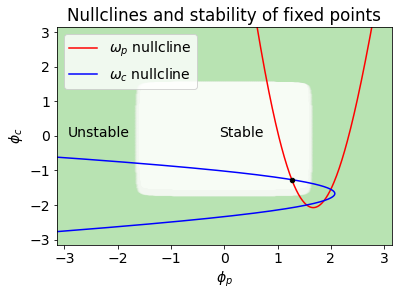

In [ ]:
G=0.2
#Calculate points
N = 500
phi_p = np.linspace(-np.pi,+np.pi,N)
phi_c = np.linspace(-np.pi,+np.pi,N)
PHI_P,PHI_C = np.meshgrid(phi_p,phi_c)
#Determinant of Jacobian
DELTA = np.cos(PHI_P)*np.cos(PHI_C)+l*(np.cos(PHI_P)+np.cos(PHI_C))

#Fixed points. 
c = (L_s*i_in+(1-L_p)*i_bi)
fixed_phi_c = -np.sin(phi_p)/l - phi_p + c/l
fixed_phi_p = -np.sin(phi_c)/l - phi_c + (c-i_bi)/l

#heplf_phi_c_up = np.arcsin(np.sin(phi_p)-i_bi)
#heplf_phi_c_down = -np.pi-np.arcsin(np.sin(phi_p)-i_bi)
#Stability
eig1,eig2,eig3,eig4 = eigen_Josephson(_,(PHI_P,_,PHI_C,_),[G,l])
stability_logical=np.logical_or(np.logical_or(np.real(eig1)>0,np.real(eig2)>0),np.logical_or(np.real(eig3)>0,np.real(eig4)>0))*1

#Visualise Delta
fig, ax = plt.subplots()
ax.set_title("Nullclines and stability of fixed points")
ax.scatter(PHI_P,PHI_C,c=stability_logical*0.3,alpha=0.2,cmap = 'Greens',vmax=1)

#Visualise theoretical fixed points
ax.plot(phi_p,fixed_phi_c,c='r',label = r"$\omega_p$ nullcline")
ax.plot(fixed_phi_p,phi_c,c='b',label = r"$\omega_c$ nullcline")
#ax.scatter(phi_p,heplf_phi_c_up,c='purple',s=1,label=r"$\sin{\phi_p}-\sin{\phi_c} = i_b$")
#ax.scatter(phi_p,heplf_phi_c_down,c='purple',s=1)
plt.text(0.5,0.5,'Stable',transform=fig.transFigure)
plt.text(0.15,0.5,'Unstable',transform=fig.transFigure)
#simulation fixed points
ax.scatter(neuron.y[0][-1]%(2*np.pi),neuron.y[2][-1]%(-2*np.pi),s = 20,c = 'k',facecolors='none',zorder=10)

ax.set_xlabel(r"$\phi_p$")
ax.set_ylabel(r"$\phi_c$")
ax.set_xlim([-np.pi, np.pi])
ax.set_ylim([-np.pi, np.pi])
ax.legend(loc = 2)
#plt.show()
plt.savefig("Stability_fp.png",bbox='tight')

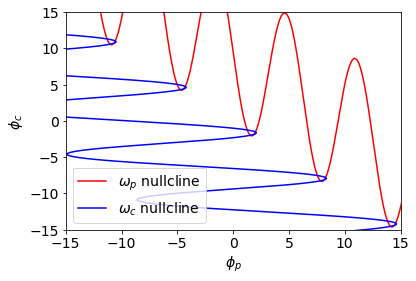

In [ ]:
#Calculate points
import matplotlib

N = 1000

G   = 1.5
l   = 0.1
i_bi= 1.909
i_in =0.0

phi_p = np.linspace(-6*np.pi,6*np.pi,N)
phi_c = np.linspace(-6*np.pi,6*np.pi,N)
PHI_P,PHI_C = np.meshgrid(phi_p,phi_c)

#Fixed points.  
fixed_phi_c = -np.sin(phi_p)/l - phi_p + (L_s*i_in+(1-L_p)*i_bi)/l
fixed_phi_p = -np.sin(phi_c)/l - phi_c + (L_s*i_in-L_p*i_bi)/l


#Visualise theoretical fixed points
plt.figure(figsize=(6,4))
plt.plot(phi_p,fixed_phi_c,c='r',label = r"$\omega_p$ nullcline")
plt.plot(fixed_phi_p,phi_c,c='b',label = r"$\omega_c$ nullcline")


plt.xlabel(r"$\phi_p$")
plt.ylabel(r"$\phi_c$")
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.legend(loc = 3)
#plt.show()
plt.savefig("fp_nullclines_rest.png",bbox='tight')

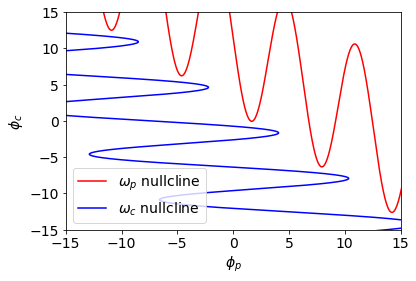

In [ ]:
#Calculate points
import matplotlib

N = 1000

G   = 1.5
l   = 0.1
i_bi= 1.909
i_in =0.4

phi_p = np.linspace(-6*np.pi,6*np.pi,N)
phi_c = np.linspace(-6*np.pi,6*np.pi,N)
PHI_P,PHI_C = np.meshgrid(phi_p,phi_c)

#Fixed points.  
fixed_phi_c = -np.sin(phi_p)/l - phi_p + (L_s*i_in+(1-L_p)*i_bi)/l
fixed_phi_p = -np.sin(phi_c)/l - phi_c + (L_s*i_in-L_p*i_bi)/l


#Visualise theoretical fixed points
plt.figure(figsize=(6,4))
plt.plot(phi_p,fixed_phi_c,c='r',label = r"$\omega_p$ nullcline")
plt.plot(fixed_phi_p,phi_c,c='b',label = r"$\omega_c$ nullcline")


plt.xlabel(r"$\phi_p$")
plt.ylabel(r"$\phi_c$")
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.legend(loc = 3)
#plt.show()
plt.savefig("fp_nullclines_spike.png")

Find fixed points and eigenvalues by solving the analytical relations

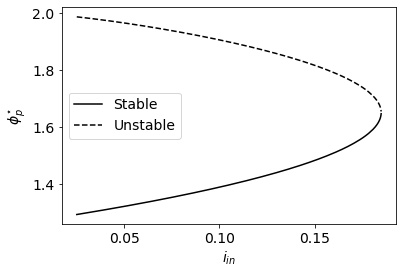

In [ ]:
L_p = 0.5
L_s = 0.5
l   = 0.1
h   = 1
i_bi= 1.909
all_i_in = np.concatenate((np.linspace(0.025,0.18,100),np.linspace(0.1801,0.19,500)))

params = [_ ,L_p, L_s, _, l, h, i_bi]
all_fixed_points_phip = find_phip_fp_iin(params,all_i_in,tol = 1e-6)
#Clear none values
valid_index = [i for i in range(len(all_fixed_points_phip)) if not (all_fixed_points_phip[i] is None)]
all_fixed_points_phip = [all_fixed_points_phip[i] for i in valid_index]
all_i_in = all_i_in[valid_index]
#Transform it to array
all_fixed_points_phip = np.array(all_fixed_points_phip)
#Visualise 
plt.figure()
#plt.title(r"Fixed points")

plt.plot(all_i_in,all_fixed_points_phip[:,0],'k',label='Stable')
plt.plot(all_i_in,all_fixed_points_phip[:,1],'k--',label='Unstable')
plt.legend()
plt.ylabel(r"$\phi_{p}^{\star}$")
plt.xlabel(r"$i_{in}$")
plt.savefig("bif_phip_over_iin.png",bbox_inches='tight')

##Eigenvalues near Class 1 and Class 2 bifurcation



In [ ]:
#Visualise imaginary or real part for 2 fixed points
def fig_eigenvalue_part(eig1_part,eig2_part,markers,colors,name = "img.png",ylabel = " ",title=" "):
  fig,axs = plt.subplots(figsize= [6.4, 4.8])
  #Plots
  for i in range(len(colors)):
    axs.plot(i_in_biff,eig1_part[i],markers[0],c=colors[i])
    axs.plot(i_in_biff,eig2_part[i],markers[1],c=colors[i])
  axs.set_xlabel(r"$i_{in}$")
  axs.set_ylabel(ylabel)
  axs.set_title(title)

  for ind in range(len(colors)):
      axs.plot(np.NaN, np.NaN, c=colors[ind], label=labels[ind])
  #Legend for marker
  ax2 = axs.twinx()
  for ind in range(len(markers)):
      ax2.plot(np.NaN, np.NaN, markers[ind],
                label=marker_label[ind], c='black')
  ax2.get_yaxis().set_visible(False)
  axs.legend(loc=3)
  ax2.legend(loc=2)
  ax2.set_title(title)
  plt.savefig(name,bbox_inches='tight')

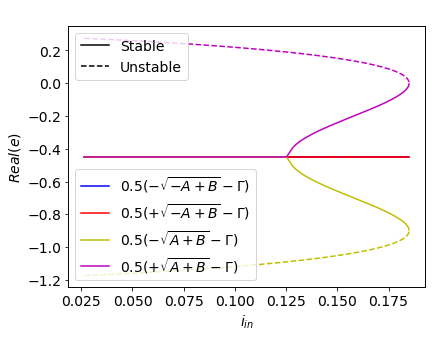

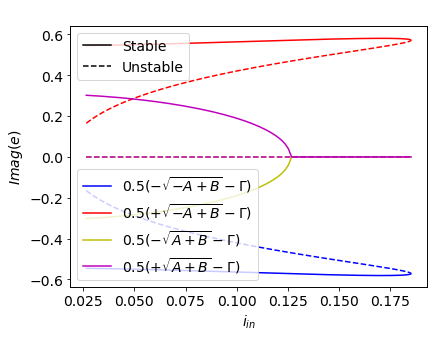

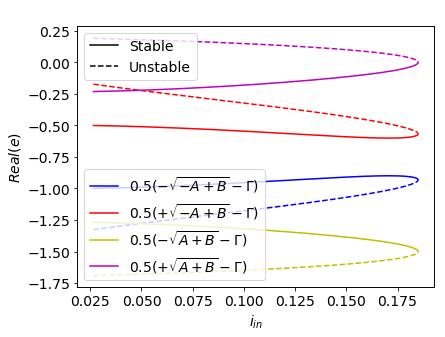

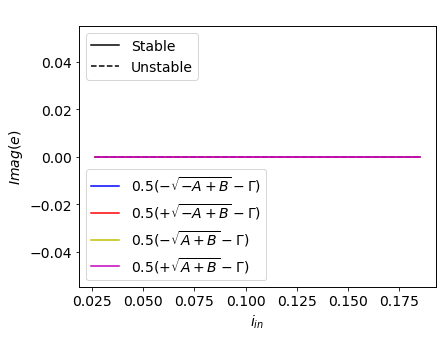

In [ ]:
# Discard the other bifurcation
import matplotlib
index_2fp = np.where(all_i_in>0.025)[0][0]
phip_biff=np.array(all_fixed_points_phip[index_2fp:])
i_in_biff=all_i_in[index_2fp:]
#Find phi_c
params[0] = i_in_biff[:,np.newaxis]*np.ones(phip_biff.shape)
phic_biff = phic_in_fp(phip_biff,params)
#Find fixed points
fp_1 = (phip_biff[:,0],0,phic_biff[:,0],0)
fp_2 = (phip_biff[:,1],0,phic_biff[:,1],0)

G1 = 1.5
G2 = 0.9
#eig_1_class1 is the eigenvalues of the stable fixed point for the first class
eig_1_class1 =eigen_Josephson(_,fp_1,[G1,l])
eig_2_class1 =eigen_Josephson(_,fp_2,[G1,l])

eig_1_class2 =eigen_Josephson(_,fp_1,[G2,l])
eig_2_class2 =eigen_Josephson(_,fp_2,[G2,l])
#Labels
colors = ['b','r','y','m']
labels = [r"$0.5(-\sqrt{-A+B}-\Gamma)$",r"$0.5(+\sqrt{-A+B}-\Gamma)$",r"$0.5(-\sqrt{A+B}-\Gamma)$",r"$0.5(+\sqrt{A+B}-\Gamma)$"]
markers = ['-','--']
marker_label=['Stable','Unstable']

#Plots

fig_eigenvalue_part(np.real(eig_1_class2),np.real(eig_2_class2),markers,colors,name = "real_eig_fp_cl2.png",ylabel = r"$Real(e)$")#,title="Class 2")
fig_eigenvalue_part(np.imag(eig_1_class2),np.imag(eig_2_class2),markers,colors,name = "imag_eig_fp_cl2.png",ylabel = r"$Imag(e)$")#,title="Class 2")

fig_eigenvalue_part(np.real(eig_1_class1),np.real(eig_2_class1),markers,colors,name = "real_eig_fp_cl1.png",ylabel = r"$Real(e)$")#,title="Class 1")
fig_eigenvalue_part(np.imag(eig_1_class1),np.imag(eig_2_class1),markers,colors,name = "imag_eig_fp_cl1.png",ylabel = r"$Imag(e)$")#,title="Class 1")

## Number of fixed points for $i_{in} \in [-2,2]$ and $i_{b} \in [-2,2]$ 

In [ ]:
%%time
L_p = 0.5
L_s = 0.5
G  = 0.9
l   = 0.1
h   = 1
all_i_bi = np.linspace(-1.99,1.99,200)
all_i_in = np.linspace(-2,2,4000)
all_number_roots = [] 
for i_bi,ind in zip(all_i_bi,range(len(all_i_bi))):
  params = [all_i_in[0] ,L_p, L_s, G, l, h, i_bi]
  all_number_roots.append(find_phip_fp_iin_number(params,all_i_in,tol = 1e-4))
  if(ind%(len(all_i_bi)/10)==0):
    print(ind)

0
20
40
60
80
100
120
140
160
180
CPU times: user 31min 58s, sys: 13.7 s, total: 32min 12s
Wall time: 32min 13s


Mounted at /content/drive


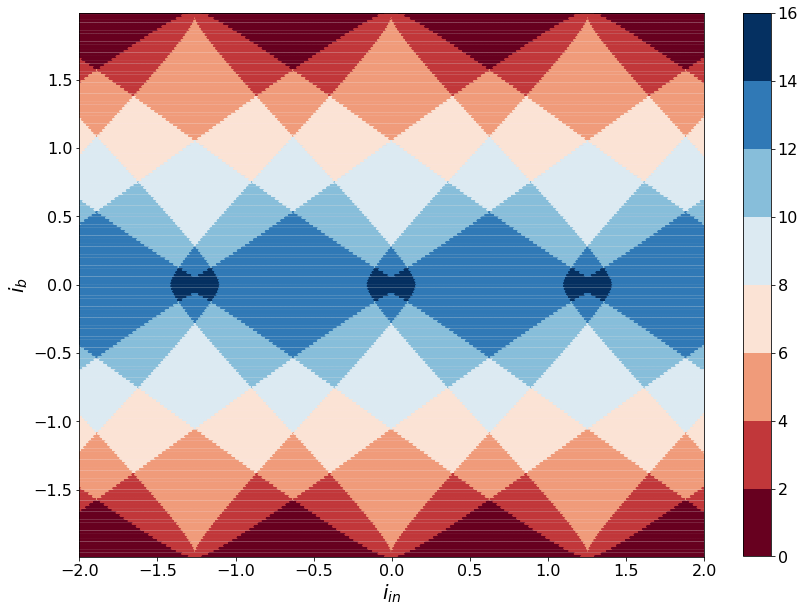

In [ ]:
from pylab import *
from google.colab import drive

drive.mount('/content/drive')
all_number_roots = np.load('drive/MyDrive/JJneurons/Stored_data/all_number_roots.npy')
all_i_bi = np.linspace(-1.99,1.99,200)
all_i_in = np.linspace(-2,2,4000)

cmap = cm.get_cmap('RdBu', np.max(all_number_roots)//2) 
plt.figure(figsize=(14,10))
plt.scatter(*np.meshgrid(all_i_in,all_i_bi),c= np.array(all_number_roots),s=1,cmap=cmap)
plt.xlabel(r"$i_{in}$",size='20')
plt.ylabel(r"$i_b$",size='20')
plt.xlim([all_i_in[0],all_i_in[-1]])
plt.ylim([all_i_bi[0],all_i_bi[-1]])
plt.colorbar()
plt.savefig("fp_N_over_i.png")
np.save("all_number_roots",np.array(all_number_roots))

#Lyapunovs

SEE JULIA

# Neurocomputational properties

We will change the parameters so that we can mimic important neurocomputational properties

## Class of 1st neuron


In [ ]:
def i_function(t,_):
  return t/5000.0 + 0.18

In [ ]:
L_p = 0.5
L_s = 0.5
G   = 1.5
l   = 0.1
h   = 1
i_bi= 1.909
i_in0 = _
time_sim = (0,600)
max_step = 1

params = [[i_in0,L_p, L_s, G, l, h, i_bi]]
neuron = solve_ivp(Josephson_neuron_variable_i_in,t_span = time_sim,y0 = (0,0,0,0),args = params,max_step = max_step)



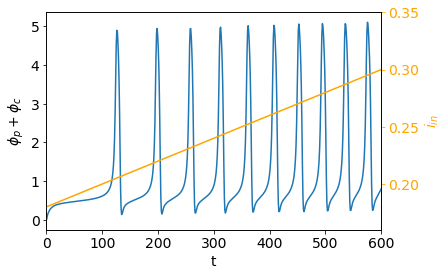

In [ ]:
fig,axs = plt.subplots(1,1)

axs.plot(neuron.t,neuron.y[0]+neuron.y[2])
ax2 = axs.twinx()
ax2.plot(neuron.t,i_function(neuron.t,_),c="orange")
ax2.set_ylabel(r"$i_{in}$",c='orange')
ax2.tick_params(axis='y', colors='orange')
axs.set_xlabel("t")
axs.set_xlim([0,600])
axs.set_ylabel(r"$\phi_p+\phi_c$")
ax2.set_ylim([0.16,0.35])
plt.savefig("Class1.png",bbox_inches="tight")

##Class 2

In [ ]:
def i_function(t,i_in0):
  return t/5000.0 + 0.18

In [ ]:
L_p = 0.5
L_s = 0.5
G   = 0.95
l   = 0.1
h   = 1
i_bi= 1.909
i_in0 = 0.1850
time_sim = (0,600)
max_step = 1

params = [[i_in0,L_p, L_s, G, l, h, i_bi]]
neuron = solve_ivp(Josephson_neuron_variable_i_in,t_span = time_sim,y0 = (0,0,0,0),args = params,max_step = max_step)



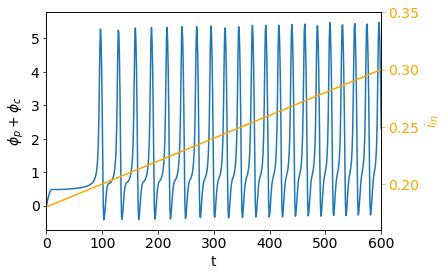

In [ ]:
fig,axs = plt.subplots(1,1)

axs.plot(neuron.t,neuron.y[0]+neuron.y[2])
ax2 = axs.twinx()
ax2.plot(neuron.t,i_function(neuron.t,_),c="orange")
ax2.set_ylabel(r"$i_{in}$",c='orange')
ax2.tick_params(axis='y', colors='orange')
axs.set_xlabel("t")
axs.set_xlim([0,600])
axs.set_ylabel(r"$\phi_p+\phi_c$")
ax2.set_ylim([0.16,0.35])
plt.savefig("Class2.png",bbox_inches="tight")

##Latency

In [ ]:
L_p = 0.5
L_s =0.5
G = 1.5
l = 0.1
h = 1.0
i_bi = 1.909
i_in0 = 0.1853

params = [[i_in0,L_p, L_s, G, l, h, i_bi]]
y0 = [1.58,0.0,-1.14,0.0]

time_sim = [0,2500.0]
max_step = 0.5

neuron1 = solve_ivp(Josephson_neuron,t_span = time_sim,y0 = y0,args = params,max_step = max_step)

params[0][3] = 0.95
neuron2 = solve_ivp(Josephson_neuron,t_span = time_sim,y0 = y0,args = params,max_step = max_step)

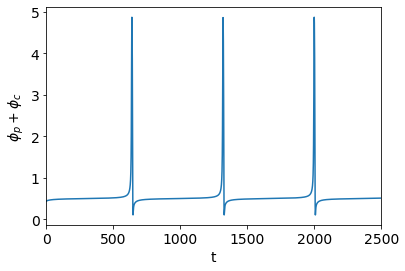

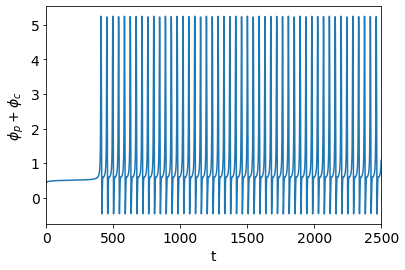

In [ ]:
plt.figure()
#plt.title("Class 1 ")
plt.plot(neuron1.t,neuron1.y[0]+neuron1.y[2])
plt.ylabel(r"$\phi_p+\phi_c$")
plt.xlabel("t")
plt.xlim(time_sim)
plt.savefig("SpikeLatency_class1.png",bbox_inches='tight')

plt.figure()
#plt.title("Class 2 ")
plt.plot(neuron2.t,neuron2.y[0]+neuron2.y[2])
plt.ylabel(r"$\phi_p+\phi_c$")
plt.xlabel("t")
plt.xlim(time_sim)
plt.savefig("SpikeLatency_class2.png",bbox_inches='tight')

##Subthreshold Oscillations

Stable fixed point is a focus for class 2 and a saddle node for class 1.  In principle we should have subthreshold oscillations for class 1 ($\Gamma <1 $). 

In the end it will depend on whether the negative real part of the eigenvalues is big enough to let the membrane wiggle near the focus.

In [ ]:
def i_function(t,i_in0):
  if(t<50 or t>55):
    return 0
  else:
    return i_in0

In [ ]:
L_p = 0.5
L_s =0.5
G = 0.9
l = 0.1
h = 1.0
i_bi = 1.909

i_in0 = 0.15

params = [[i_in0,L_p, L_s, G, l, h, i_bi]]
y0 = [0,0.0,0,0.0]

time_sim = [0,100.0]
max_step = 0.5

neuron = solve_ivp(Josephson_neuron_variable_i_in,t_span = time_sim,y0 = y0,args = params,max_step = max_step)

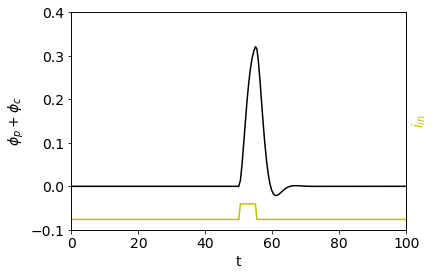

In [ ]:
fig,axs = plt.subplots()
axs.set_ylabel(r"$\phi_p+\phi_c$")
axs.set_ylim([-0.1,0.4])
axs.set_xlabel("t")
axs.plot(neuron2.t,neuron2.y[0]+neuron2.y[2],'k')
axs.set_xlim(time_sim)
ax2 = axs.twinx()
ax2.set_ylim([-0.1,2.0])
ax2.set_yticks([])
ax2.set_ylabel(r"$i_{in}$",c='y')
ax2.plot(neuron.t,[i_function(t,i_in0) for t in neuron.t],c='y')

  
plt.savefig("Subthreshold_class2.png",bbox_inches='tight')

## Frequency preference

We calculate the maximum responce $(\phi_p+\phi_c)$ of a neuron given a stimuli of 2 step pulses with varied delay between them.

In [ ]:
def i_function(t,i_in0):
  global delay
  i_in = 0
  if(t>50 and t<55):
    i_in += i_in0
  if(t>50+delay and t<55+delay):
     i_in += i_in0
  return i_in

In [ ]:
%%time
L_p = 0.5
L_s =0.5
G2 = 0.95
l = 0.1
h = 1.0
i_bi = 1.909
i_in0 = 0.1

params2 = [[i_in0,L_p, L_s, G2, l, h, i_bi]]

y0 = [0,0.0,0,0.0]

all_delay = np.arange(0,20,0.1)

time_sim = [0,200.0]
max_step = 0.1

max_resp2 = []

for delay in all_delay:
  neuron2 = solve_ivp(Josephson_neuron_variable_i_in,t_span = time_sim,y0 = y0,args = params2,max_step = max_step)
  max_resp2.append(np.max(neuron2.y[0]+neuron2.y[2]))


CPU times: user 1min 5s, sys: 173 ms, total: 1min 5s
Wall time: 1min 5s


ω = 0.5220976108863042
T = 12.034503081738595


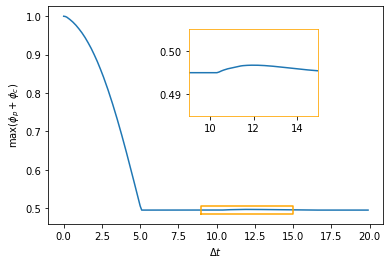

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(all_delay,max_resp2/np.max(max_resp2))
ax1.set_xlabel(r"$\Delta t$")
ax1.set_ylabel(r"max($\phi_p+\phi_c$)")

del_start,del_end,flux_start,flux_end=[9,15,0.485,0.505]
left, bottom, width, height = [0.45, 0.5, 0.3, 0.3]
c="orange"
ax1.plot([del_start,del_start,del_end,del_end,del_start],[flux_start,flux_end,flux_end,flux_start,flux_start],c=c)
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(all_delay,max_resp2/np.max(max_resp2))

ax2.spines['right'].set_color(c)
ax2.spines['top'].set_color(c) 
ax2.spines["bottom"].set_color(c)
ax2.spines["left"].set_color(c)
#ax2.set_xticklabels([])
#ax2.set_yticklabels([])

ax2.set_ylim([flux_start,flux_end])
ax2.set_xlim([del_start,del_end])

plt.savefig("frequency_preference_class2.png",bbox_inches='tight')
eig_2 =eigen_Josephson(_,neuron2.y[:,-1],params=[G2,l])
print("ω = "+str(np.max(np.imag(eig_2))))
print("T = "+str(2*np.pi/np.max(np.imag(eig_2))))

## Chaotic Spiking

In [ ]:
L_p = 0.5
L_s =0.5
l = 0.1
h = 1.0
i_bi= 1.909

i_in0 = 0.2
G =  0.8

params = [[i_in0,L_p, L_s, G, l, h, i_bi]]

y0 = [0,5,0,0]
time_sim = (0,2000)
max_step=0.5

neuron = solve_ivp(Josephson_neuron,t_span = time_sim,y0 = y0,args = params,max_step = max_step)

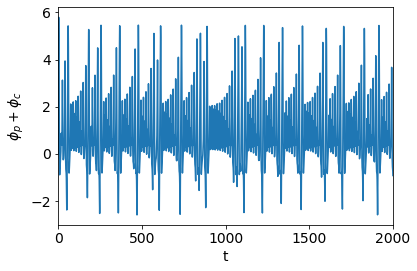

In [ ]:
fig,axs = plt.subplots()
axs.plot(neuron.t,neuron.y[0]+neuron.y[2])
axs.set_xlabel("t")
axs.set_ylabel(r"$\phi_p+\phi_c$")
axs.set_xlim(time_sim)
plt.savefig("ChaoticSpiking.png",bbox_inches='tight')

## Other non spike-like LC

In [ ]:
L_p = 0.5
L_s =0.5
l = 0.1
h = 1.0
i_bi= 1.909

i_in0 = 0.0
G =  0.8

params = [[i_in0,L_p, L_s, G, l, h, i_bi]]

y0 = [0,5,0,0]
time_sim = (0,500)
max_step=0.5

neuron = solve_ivp(Josephson_neuron,t_span = time_sim,y0 = y0,args = params,max_step = max_step)

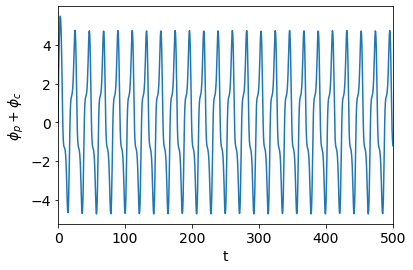

In [ ]:
plt.plot(neuron.t,neuron.y[0]+neuron.y[2])
plt.xlabel("t")
plt.ylabel(r"$\phi_p+\phi_c$")
plt.xlim(time_sim)
plt.savefig("Nonspike.png",bbox_inches='tight')